<hr/>

# Data Mining 
**Tamás Budavári** - budavari@jhu.edu <br/>

- Tree data structures
- Classification trees

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Trees</font></h1>
<hr/>

- Recursive data structures

> **Recursion**<br/>
> To know recursion, you must first know [recursion](https://en.wikipedia.org/wiki/Recursion).

> **Recursive Acronyms** <br/>
>   GNU: GNU is Not Unix <br/>
>   LAME: LAME Ain't an MP3 Encoder<br/>
>   PIP: PIP Installs Packages

- Used everywhere

> Searches, decisions, etc...


In [2]:
# Factorial using recursion
def f(n):
    if n>0: return n * f(n-1)
    else: return 1

In [3]:
f(5)

120

In [4]:
func = np.vectorize(f)
func([4,5,2])

array([ 24, 120,   2])

### [Binary Tree](https://en.wikipedia.org/wiki/Binary_tree)
- Connected nodes - special tree structures

> There is one root node

> Every node has maximum two nodes (left, right)

> Leaves are the terminal nodes

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
<!--
<img src="files/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
-->

In [5]:
class node(object):
    
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
   
    def __repr__(self, i=0):
        s = '\t'*i + '[' + repr(self.data) + '] \n'
        if self.left is not None:  
            s += self.left.__repr__(i+1)
        if self.right: # same thing
            s += self.right.__repr__(i+1)
        return s

In [6]:
root = node(2, 
            node(7,
                 node(2), 
                 node(6, node(5), node(11))),
            node(5, None,
                 node(9, node(4)))
           )

root

[2] 
	[7] 
		[2] 
		[6] 
			[5] 
			[11] 
	[5] 
		[9] 
			[4] 

In [7]:
print (root.left.left.data)

2


In [8]:
root.left.left.left = node(99)
root.left.left.right = node(999)
root

[2] 
	[7] 
		[2] 
			[99] 
			[999] 
		[6] 
			[5] 
			[11] 
	[5] 
		[9] 
			[4] 

In [9]:
root.right.right.data

9

### $n$-ary Tree

In [10]:
class node(object):
    
    def __init__(self, data, children=[]):
        self.data = data
        self.children = children
        
    def __repr__(self, i=0):
        s = '\t'*i + repr(self.data) + '\n' 
        for child in self.children:
            s += child.__repr__(i+1)
        return s

In [11]:
# build a tree
root = node(2, [ 
            node(7, [
                node(2),
                node(6, [
                        node(5), 
                        node(11)])]),
            node(5, [
                node(9, [node(4)])])
            ]);

root

2
	7
		2
		6
			5
			11
	5
		9
			4

In [12]:
root.children.append(node(999))
root

2
	7
		2
		6
			5
			11
	5
		9
			4
	999

### Trees are everywhere!

- Searching

> [k-d trees](https://en.wikipedia.org/wiki/K-d_tree), [B-tree](https://en.wikipedia.org/wiki/B-tree), [R-tree](https://en.wikipedia.org/wiki/R-tree), [ball trees](https://en.wikipedia.org/wiki/Ball_tree), etc...

> E.g., for nearest neighbor searches

- Decisions 

> E.g., for classification 

### $k$-d tree

- Balanced tree
- Split along axes

Constructed from points, see Figure from Wikipedia<br/>
{ (2,3), (5,4), (9,6), (4,7), (8,1), (7,2) }

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Kdtree_2d.svg/1200px-Kdtree_2d.svg.png" alt="Kdtree 2d.svg" width=300 align=left> 
<!--
<img src="files/1200px-Kdtree_2d.svg.png" alt="Kdtree 2d.svg" width=300 align=left> 
-->



<h1><font color="darkblue">Decision Tree</font></h1>
<hr/>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 
>
> $\theta = $ (feature $j$, threshold $t$) 
>
> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*
>
> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$

>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$

> Or variance for regression


In [ ]:
x = np.linspace(0,1,100)
figure(figsize=(3,1.5)); plot(x, x*(1-x));

### Toy Example

- Calculate by hand...

In [ ]:
X = np.array([[.7,0],[1,.3],[1.1,0],[.9,0],[1,0],[1,-.1],[1,.1],[1,.2]],
             dtype=np.float)
c = np.array([ 0,0,0,0, 1,1,1, 2], dtype=np.float)
figure(figsize(3,3))
subplot(111,aspect='equal'); scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

### Gini impurity of a partition

- We have 3 classes total hence the sum for the entire dataset is

>$ \displaystyle H = \frac{4}{8}\left(1\!-\!\frac{4}{8}\right) 
     + \frac{3}{8}\left(1\!-\!\frac{3}{8}\right) 
     + \frac{1}{8}\left(1\!-\!\frac{1}{8}\right) $ $ \displaystyle = \frac{16}{64}
     + \frac{15}{64}
     + \frac{7}{64}
     = \frac{19}{32} = 0.59375$
     
- This is the root of the tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=9999)
clf.fit(X,c)

print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)

### Impurity of 2 partitions after first split

- The root partition contains 3 classes hence the sum is

>$ \displaystyle H_{\rm{}left} = \frac{2}{2}\left(1\!-\!\frac{2}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right)= 0$

>$ \displaystyle H_{\rm{}right} = \frac{3}{6}\left(1\!-\!\frac{3}{6}\right) 
     + \frac{2}{6}\left(1\!-\!\frac{2}{6}\right) 
     + \frac{1}{6}\left(1\!-\!\frac{1}{6}\right) $ 
 $ \displaystyle = \frac{9}{36}
     + \frac{8}{36}
     + \frac{5}{36}
     = \frac{11}{18} $ $\approx 0.61111111$

> Cf. numbers above

- Note importance of weighting by partition sizes!

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,c)

print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)

### Example

Use the sklearn routines to 

- Load the iris dataset and use the first 2 features
- Run the decision tree classifier with different depths
- Use cross-validation and plot the results

<a href="http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py"><img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_0011.png" align=left width=500 \></a>

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target[:] # copy
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print ('New classes:', np.unique(c))
print ('New data:', X.shape)

In [ ]:
subplot(111,aspect='equal'); 
scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

In [ ]:
# grid of points within the limits
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X,c).predict(grid).reshape(x.shape)
    figure(figsize=(3,3)); subplot(111,aspect='equal')
    contourf(x, y, z, cmap=cm.Spectral_r)
    scatter(X[:,0], X[:,1], c=c, cmap=cm.gray);

<h1><font color="darkblue">Random Forest</font></h1>
<hr/>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

### Forest of Random Trees

- Create multiple randomized trees to classify

> Combine the results, e.g., voting

- Check out Boostrap and [Bagging](https://scikit-learn.org/stable/modules/ensemble.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf = RandomForestClassifier(n_estimators=200,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

cross_val_score(clf, X,c, cv=10)

### Assumptions and Limitations

- Axis parallel boundaries might be suboptimal

- But there is no need for a distance function

- And improved by random forest with many trees

also

- Improvements in the estimation error by random forest
cf. central limit theorem



### Divide and Conquer

- These methods are applicable to regression problems

> Minimize the variance of the left and right partitions

> e.g., piecewise constant

- Useful concepts to consider to build complex methods



### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 

### Unhomework

Go to http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and modify the code to run all classifiers that we learned so far

<h1><font color="darkblue">Summary</font></h1>
<hr/>

In [ ]:
import datetime
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

### Decision Tree

- **Intuition:** Look for the best split for the data

<img src='https://congm.github.io/teaching/Data%20Mining/files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

- **Classification criteria:** At a given node with dataset $D$ we want to find the best split $ \quad \theta = (\text{feature} \  j, \text{threshold} \  t) \quad $ to minimize impurity
> $ \displaystyle I(\theta) = \frac{n_{\text{left}}}{n}\, H \left(D_{\text{left}}(\theta) \right) + \frac{n_{\text{right}}}{n}\, H \left(D_{\text{right}}(\theta) \right) $

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=4)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

<img src='https://congm.github.io/teaching/Data%20Mining/files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

In [7]:
clf.tree_.impurity

array([ 0.66666667,  0.        ,  0.5       ,  0.16803841,  0.04079861,
        0.        ,  0.        ,  0.44444444,  0.        ,  0.44444444,
        0.        ,  0.        ,  0.04253308,  0.44444444,  0.        ,
        0.        ,  0.        ])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# -2 means leaf
clf.tree_.feature

array([ 2, -2,  3,  2,  3, -2, -2,  3, -2,  0, -2, -2,  2,  1, -2, -2, -2])

In [10]:
# -2 means leaf
clf.tree_.threshold

array([ 2.45000005, -2.        ,  1.75      ,  4.94999981,  1.6500001 ,
       -2.        , -2.        ,  1.54999995, -2.        ,  6.94999981,
       -2.        , -2.        ,  4.85000038,  3.0999999 , -2.        ,
       -2.        , -2.        ])

In [11]:
# The higher, the more important the feature
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
# It is also known as the Gini importance
clf.feature_importances_

array([ 0.01333333,  0.01333333,  0.55072262,  0.42261071])

- **Note:** For `DecisionTreeClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- **Example**

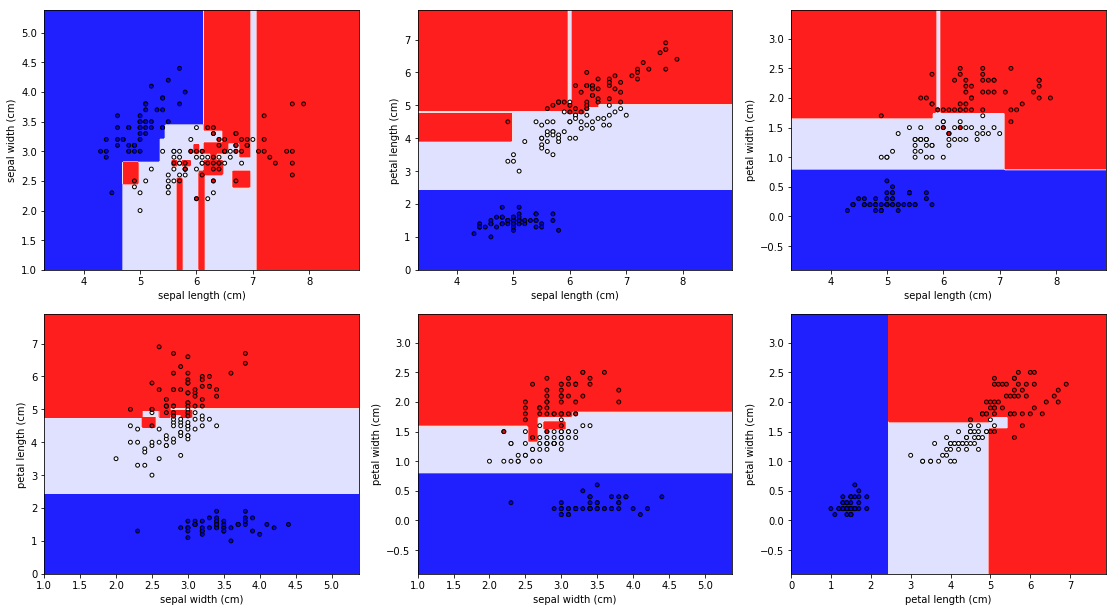

In [12]:
# Figure size
figure(figsize=(16, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # Only take two features each time
    X = iris.data[:, pair]
    y = iris.target

    # Train classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y);
    
    # Generate grid data
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    # Predict the class for grid data
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    subplot(2, 3, pairidx + 1);
    contourf(xx, yy, Z, cmap=cm.bwr);
    xlabel(iris.feature_names[pair[0]]);
    ylabel(iris.feature_names[pair[1]]);
    tight_layout(h_pad=1, w_pad=1, pad=2.5);

    # Plot the training points
    scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr, edgecolor='black', s=15);